In [35]:
import warnings

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

warnings.filterwarnings('ignore')

### Задача 1
Даны значения зарплат из выборки выпускников: 
```
100, 80, 75, 77, 89, 33, 45, 25, 65, 17, 30, 24, 57, 55, 70, 75, 65, 84, 90, 150.
```
Без использования статистических функций вроде `mean`, `std`, `var`, посчитать среднее арифметическое, среднее квадратичное отклонение, смещенную и несмещенную оценки дисперсий для данной выборки.

Можно затем посчитать те же значения с использованием статистических функций, чтобы проверить себя.

#### Решение:

In [36]:
df = pd.DataFrame([100, 80, 75, 77, 89, 33, 45, 25, 65, 17, 30, 24, 57, 55, 70, 75, 65, 84, 90, 150])

In [37]:
# Найдем среднее значение
mean_salary = df[0].sum() / df[0].count()
mean_salary

65.3

In [38]:
df[0].mean()

65.3

In [39]:
#Найдем медиану
df[0].median()

67.5

In [40]:
#Найдем моду
df[0].value_counts()

65     2
75     2
30     1
45     1
100    1
70     1
57     1
77     1
25     1
80     1
17     1
84     1
90     1
150    1
55     1
24     1
89     1
33     1
Name: 0, dtype: int64

In [41]:
df[0].mode()

0    65
1    75
dtype: int64

In [42]:
#Найдем смещенное средее квадратичное отклонение
salary_std = np.sqrt(((df[0] - df[0].mean()) ** 2).sum() / df[0].count())
salary_std

30.823854398825596

In [43]:
df[0].std(ddof=0)

30.823854398825596

In [44]:
#Найдем несмещенное средее квадратичное отклонение
salary_std = np.sqrt(((df[0] - df[0].mean()) ** 2).sum() / (df[0].count() - 1))
salary_std

31.624607341019814

In [45]:
df[0].std()

31.624607341019814

In [46]:
#Найдем смещенную дисперсию
salary_variance = ((df[0] - df[0].mean()) ** 2).sum() / df[0].count()
salary_variance

950.11

In [47]:
df[0].var(ddof=0)

950.11

In [48]:
#Найдем несмещенную дисперсию
salary_variance = ((df[0] - df[0].mean()) ** 2).sum() / (df[0].count() - 1)
salary_variance

1000.1157894736842

In [49]:
df[0].var()

1000.1157894736842

#### Ответ:
Средняя зарплата 65.3

Медиана зарплаты 67.5

Мода зарплаты 65 и 75

_Различные значения средней, моды и медианы говорят о не нормальном характере распределения_

Среднее квадратичное отклонение смещенное 30.82, несмещенное 31.62

Дисперсия смещенная 950.11, несмещенная 1000.12

### Задача 2
Для выборки из задачи 1 найти первый и третий квартили, интерквартильное расстояние. Найти выборсы в выборке, используя для этого "усы" из `boxplot`. В этой задаче можно использовать статистические функции.

#### Решение:

In [50]:
#Найдем квартили
df[0].quantile([0.25, 0.5, 0.75])

0.25    42.0
0.50    67.5
0.75    81.0
Name: 0, dtype: float64

In [51]:
#Интерквартильный размах
df[0].quantile(0.75) - df[0].quantile(0.25)

39.0

<AxesSubplot:>

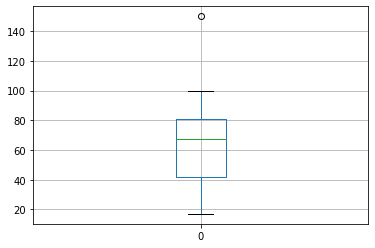

In [52]:
df[[0]].boxplot()

In [53]:
#Найдем выбросы
outliers = df.loc[(df[0] > (df[0].quantile(0.75) + 1.5 * (df[0].quantile(0.75) - df[0].quantile(0.25)) ))]
outliers

,0
19,150


#### Ответ:
Первый квартиль 42

Третий квартиль 81

Интерквартильный размах 39

Единственный выброс 150

### Задача 3
В университет на факультеты `A` и `B` поступило равное количество студентов, а на факультет `C` студентов поступило столько же, сколько на `A` и `B` вместе. Вероятность того, что студент факультета `A` сдаст первую сессию, равна 0.8. Для студента факультета `B` эта вероятность равна 0.7, а для студента факультета `C` - 0.9. Студент сдал первую сессию. Какова вероятность, что он учится: a) на факультете `A`? б) на факультете `B`? в) на факультете `C`?

_Замечание_: да, эта задача не на тему описательных статистик, но тема важная, и её стоит иногда освежать в памяти.

#### Решение:
Событие $А$ - сдача сессии, а событие $В_i$ - студент учится на определенном факультете. 

Т.к. на факультете С студентов столько же, сколько на факультетах А и В, а количество студентов на факультетах А и В равно, то вероятность, что студент учится на факультете С равна 1/2, а на факультете А или В - 1/4: $$P(B_А) = P(B_В) = 0.25, P(B_С) = 0.5,$$ а вероятность сдачи сессии студентом с опредленного факультета равна $$P(A\:|\:B_А) = 0.8, P(A\:|\:B_В) = 0.7, P(A\:|\:B_С) = 0.9$$

Посчитаем полную вероятность сдать сессию $$P(A) = P(B_А) \cdot P(A | B_А) + P(B_В) \cdot P(A | B_В) + P(B_С) \cdot P(A | B_С) = 0.25 \cdot 0.8 + 0.25 \cdot 0.7 + 0.5 \cdot 0.9 = \dfrac{33}{40} = 0.825$$

In [54]:
0.25 * 0.8 + 0.25 * 0.7 + 0.5 * 0.9

0.825

##### а)
Вероятность, что сдавший сессию студент учится на факультете А равна
$$P(B_А\:|\:A) = \dfrac{\frac{1}{4} \cdot 0.8}{\dfrac{33}{40}} = \frac{8}{33} = 0.(24)$$

In [55]:
8/33

0.24242424242424243

##### б)
Вероятность, что сдавший сессию студент учится на факультете В равна
$$P(B_В\:|\:A) = \dfrac{\frac{1}{4} \cdot 0.7}{\dfrac{33}{40}} = \frac{7}{33} = 0.(21)$$

In [56]:
7/33

0.21212121212121213

##### с)
Вероятность, что сдавший сессию студент учится на факультете С равна
$$P(B_С\:|\:A) = \dfrac{\frac{2}{4} \cdot 0.9}{\dfrac{33}{40}} = \frac{18}{33} = 0.(54)$$

In [57]:
18/33

0.5454545454545454

#### Ответ:
а) 8/33

б) 7/33

с) 18/33